In [3]:
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import SPSA, ADAM
import numpy as np
import matplotlib.pyplot as plt

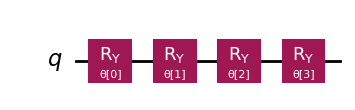

In [4]:
num_qubits = 1 
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = ADAM(maxiter=100)
ansatz.decompose().draw("mpl")

In [5]:
estimator = Estimator()
vqe = VQE(estimator, ansatz, optimizer)

/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_9817/2449948782.py:1: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [6]:
E1 = 0.0
E2 = 4.0

V11 = 3.0
V22 = -3.0
V12 = V21 = 0.2

H0 = np.array([[E1, 0],
               [0, E2]])

HI = np.array([[V11, V12],
              [V21, V22]])

<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_9817/3583105224.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Eigenenergy vs. $\lambda$")


0.004837875423505222
2.67961894317202
3.658067243486059
1.8363500853676824
1.78184127375857
0.27590665698902894
0.8644581972970644
2.4990835406310348
0.949826297984913
3.1302127715557715
0.33270964380072954
0.8626123006199535
0.9833383116632202
0.6586942405086011
2.7116497038208274
0.5487697708133461
0.9127617122908394
1.49985864913052
1.087267393740255
0.6347602682426825
3.10906435201685
2.9473998271892246
0.6854386278113129
1.69351079036338
1.6283469851848356
1.010895745954579
2.0361452872381762
1.9338172650480012
0.9436453240650506
1.3394380435718927
1.0865937863000266
0.9294777635201554
0.9580332477087272
1.0282640257000804
1.0557992011930097
1.688083609508963
1.0785349134230628
1.238428587734862
1.1370802113889154
1.7266679049852758
1.9365050663538526
2.579187994192041
1.5274944222301543
1.368635068089576
2.021922226793197
2.189173310709
2.085110603791738
2.1207228608304094
2.0996580342867333
1.554738364077831
1.8487942598646725
2.3584361808282437
2.3726963012472027
1.590797997287

/var/folders/79/zdv5htt15x92kt2dpnpnz09m0000gn/T/ipykernel_9817/3583105224.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


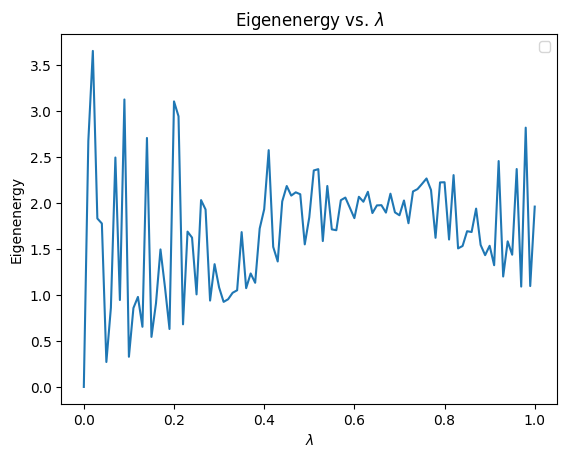

In [7]:
def problem_c() -> None:
    lambdas = np.linspace(0, 1, 101)

    lower_eig = []

    for lmbda in lambdas:
        
        H2_op = SparsePauliOp.from_operator(H0 + lmbda*HI)

        minresult = vqe.compute_minimum_eigenvalue(H2_op)
        lower_eig.append(minresult.eigenvalue)
        print(minresult.eigenvalue)
     

    plt.plot(lambdas, lower_eig)
    plt.title("Eigenenergy vs. $\lambda$")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("Eigenenergy")
    plt.legend()
    plt.savefig("images/problem_c.png")
    plt.show()

problem_c()